<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.nus.edu.sg/images/default-source/base/logo.png' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning in Python</h1><h2>Lab 2a - Introduction on ML Models </h2><h3></h3></th>
    </tr>
</table>

In [2]:
# Import the requried packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, neighbors, tree, svm, ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

### 1.Classification

We will be using the bank marketing campaign data for classification task. The dataset (`bank.csv`) gives you information about a marketing campaign done by a financial institution. Detailed information (i.e. column description) is provided below. We are trying to predict whether the customer/client will deposit the money into the bank or not?

 * **age :**  age in years
 * **job :**  type of job
 * **marital :**  marital status 
 * **education :**  education background 
 * **default :**  has credit in default? 
 * **balance :**  Balance of the individual
 * **housing :**  has housing loan? 
 * **loan :**  has personal loan? 
 * **contact :**  contact communication type 
 * **day :**  last contact day of the week 
 * **month :**  last contact month of year 
 * **duration :**  last contact duration, in seconds 
 * **campaign :**  number of contacts performed during this campaign and for this client
 * **pdays :**  number of days that passed by after the client was last contacted from a previous campaign 
 * **previous :**  number of contacts performed before this campaign and for this client
 * **poutcome :**  outcome of the previous marketing campaign 
 * <font color='red'> **deposit :** has the client subscribed a term deposit? This is the TARGET variable </font> 

*Data Source: Kaggle*

In [3]:
# Loading the data
bank = pd.read_csv('bank.csv')
bank.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [53]:
# Encode the categorical data into numbers
bank_cat = bank.select_dtypes(['object']).copy()
for col in bank_cat:
    print(col, ':')
    codes, uniques = pd.factorize(bank_cat[col], sort=True)
    bank[col]=codes
    print(uniques)

job :
Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object')
marital :
Index(['divorced', 'married', 'single'], dtype='object')
education :
Index(['primary', 'secondary', 'tertiary', 'unknown'], dtype='object')
default :
Index(['no', 'yes'], dtype='object')
housing :
Index(['no', 'yes'], dtype='object')
loan :
Index(['no', 'yes'], dtype='object')
contact :
Index(['cellular', 'telephone', 'unknown'], dtype='object')
month :
Index(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')
poutcome :
Index(['failure', 'other', 'success', 'unknown'], dtype='object')
deposit :
Index(['no', 'yes'], dtype='object')


In [54]:
bank.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [55]:
bank.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

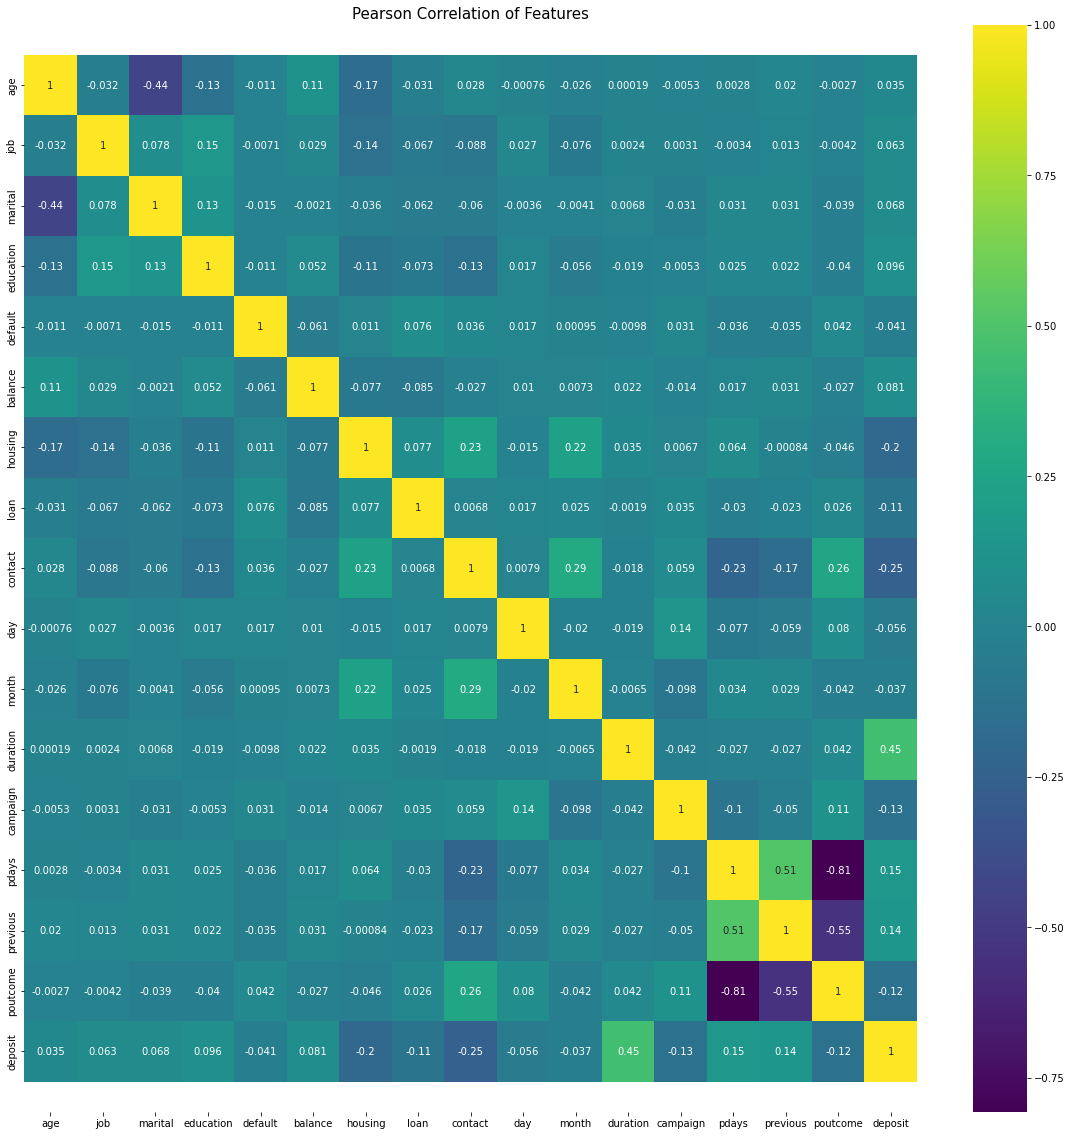

In [7]:
# Heatmap: the correlation between any two features/variables
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(bank.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [57]:
bank

age  job  marital  education  default  balance  housing  loan  contact  \
0       59    0        1          1        0     2343        1     0        2   
1       56    0        1          1        0       45        0     0        2   
2       41    9        1          1        0     1270        1     0        2   
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11160   43    9        1          1        0        0        0     1        0   
11161   34    9        1          1        0        0        0     0        0   

       day  month  duration  campaign  pdays  previous  poutcome  deposit  
0        5      8      1042         1     -1         0         3        1  
1        5      8      1467         1     -1         0         3        1  
2        5      8      1389         1     -1         0         3        1  
3        5      8       579         1     -1         0         3        1  
4        5      8       673         2     -1         0         3        1  
...    ...    ...       ...       ...    ...       ...       ...      ...  
11157   20      0       257         1     -1         0         3        0  
11158   16      6        83         4     -1         0         3        0  
11159   19      1       156         2     -1         0         3        0  
11160    8      8         9         2    172         5         0        0  
11161    9      5       628         1     -1         0         3        0  

[11162 rows x 17 columns]

In [58]:
# Set the "deposit" as target/model output and the rest features as model inputs
y = bank['deposit']
X = bank.drop(['deposit'], axis=1)

In [61]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
X_train

age  job  marital  education  default  balance  housing  loan  contact  \
10713   45    0        1          3        0     2033        0     0        0   
8431    56    0        1          0        0      202        1     0        2   
9060    50    3        2          1        0      799        0     0        1   
8604    58    0        1          1        0     1464        1     1        2   
2988    43    4        2          2        0    11891        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
1099    29   10        2          0        0      550        0     0        0   
2514    23    8        2          1        0      431        0     0        0   
6637    39    4        1          2        0        0        1     0        0   
2575    60    0        1          1        0      106        0     0        0   
7336    40    0        0          1        0      274        1     1        0   

       day  month  duration  campaign  pdays  previous  poutcome  
10713   28      8        48         4     -1         0         3  
8431     9      8       178         2     -1         0         3  
9060    28      4        63         1     -1         0         3  
8604     5      6        53        29     -1         0         3  
2988     4      2       821         5    242         1         2  
...    ...    ...       ...       ...    ...       ...       ...  
1099    29      4       801         1     -1         0         3  
2514    13      1       496         2     -1         0         3  
6637    11      8       112         1     -1         0         3  
2575    21      1       216         3     91         1         2  
7336    25      5        53         4     -1         0         3  

[8929 rows x 16 columns]

In [63]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [64]:
X_train

age       job   marital  education   default   balance   housing  \
10713  0.311590 -1.399276 -0.323496   2.287973 -0.119149  0.150938 -0.942781   
8431   1.233067 -1.399276 -0.323496  -1.715942 -0.119149 -0.415907  1.060573   
9060   0.730443 -0.467874  1.274123  -0.381304 -0.119149 -0.231086 -0.942781   
8604   1.400608 -1.399276 -0.323496  -0.381304 -0.119149 -0.025215  1.060573   
2988   0.144049 -0.157407  1.274123   0.953334 -0.119149  3.202795 -0.942781   
...         ...       ...       ...        ...       ...       ...       ...   
1099  -1.028739  1.705397  1.274123  -1.715942 -0.119149 -0.308172 -0.942781   
2514  -1.531363  1.084462  1.274123  -0.381304 -0.119149 -0.345013 -0.942781   
6637  -0.191033 -0.157407 -0.323496   0.953334 -0.119149 -0.478442  1.060573   
2575   1.568149 -1.399276 -0.323496  -0.381304 -0.119149 -0.445627 -0.942781   
7336  -0.107263 -1.399276 -1.921114  -0.381304 -0.119149 -0.393617  1.060573   

           loan   contact       day     month  duration  campaign     pdays  \
10713 -0.389825 -0.598686  1.463949  0.806711 -0.939404  0.531137 -0.479882   
8431  -0.389825  1.845607 -0.797574  0.806711 -0.565266 -0.192912 -0.479882   
9060  -0.389825  0.623460  1.463949 -0.444320 -0.896235 -0.554937 -0.479882   
8604   2.564968  1.845607 -1.273684  0.181196 -0.925014  9.581747 -0.479882   
2988  -0.389825 -0.598686 -1.392711 -1.069836  1.285282  0.893161  1.778920   
...         ...       ...       ...       ...       ...       ...       ...   
1099  -0.389825 -0.598686  1.582977 -0.444320  1.227722 -0.554937 -0.479882   
2514  -0.389825 -0.598686 -0.321464 -1.382594  0.349935 -0.192912 -0.479882   
6637  -0.389825 -0.598686 -0.559519  0.806711 -0.755213 -0.554937 -0.479882   
2575  -0.389825 -0.598686  0.630757 -1.382594 -0.455902  0.169112  0.375303   
7336   2.564968 -0.598686  1.106867 -0.131562 -0.925014  0.531137 -0.479882   

       previous  poutcome  
10713 -0.375551  0.518328  
8431  -0.375551  0.518328  
9060  -0.375551  0.518328  
8604  -0.375551  0.518328  
2988   0.083679 -0.485173  
...         ...       ...  
1099  -0.375551  0.518328  
2514  -0.375551  0.518328  
6637  -0.375551  0.518328  
2575   0.083679 -0.485173  
7336  -0.375551  0.518328  

[8929 rows x 16 columns]

In [65]:
#Logistic Regression Model
lg_clf = linear_model.LogisticRegression()
lg_clf.fit(X_train, y_train)

LogisticRegression()

In [66]:
#training acc
lg_train_acc = lg_clf.score(X_train, y_train)
print('LogisticRegression training accuracy: ', lg_train_acc)

#testing acc
lg_test_acc = lg_clf.score(X_test, y_test)
print('LogisticRegression testing accuracy: ', lg_test_acc)

LogisticRegression training accuracy:  0.795721805353343
LogisticRegression testing accuracy:  0.8007165248544559


In [67]:
#K Nearest Neighbors Model
knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
#training acc
knn_train_acc = knn_clf.score(X_train, y_train)
print('KNN training accuracy: ', knn_train_acc)

#testing acc
knn_test_acc = knn_clf.score(X_test, y_test)
print('KNN testing accuracy: ', knn_test_acc)

KNN training accuracy:  0.846119386269459
KNN testing accuracy:  0.77384684281236


In [69]:
#Decision Tree Model
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
#training acc
dt_train_acc = dt_clf.score(X_train, y_train)
print('DecisionTree training accuracy: ', dt_train_acc)

#testing acc
dt_test_acc = dt_clf.score(X_test, y_test)
print('DecisionTree testing accuracy: ', dt_test_acc)

DecisionTree training accuracy:  1.0
DecisionTree testing accuracy:  0.7622033139274519


In [71]:
#Support Vector Machine Model
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [72]:
#training acc
svm_train_acc = svm_clf.score(X_train, y_train)
print('SVM training accuracy: ', svm_train_acc)

#testing acc
svm_test_acc = svm_clf.score(X_test, y_test)
print('SVM testing accuracy: ', svm_test_acc)

SVM training accuracy:  0.8425355582932019
SVM testing accuracy:  0.8204209583519928


In [73]:
#Random Forest Model
rf_clf = ensemble.RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
#training acc
rf_train_acc = rf_clf.score(X_train, y_train)
print('RandomForest training accuracy: ', rf_train_acc)

#testing acc
rf_test_acc = rf_clf.score(X_test, y_test)
print('RandomForest testing accuracy: ', rf_test_acc)

RandomForest training accuracy:  1.0
RandomForest testing accuracy:  0.8432601880877743


<AxesSubplot:title={'center':'Train & Test Accuracy for different models'}>

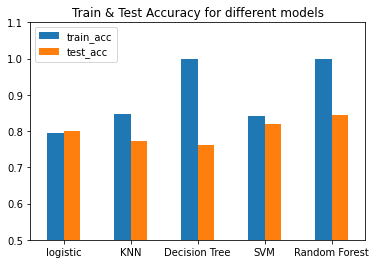

In [75]:
# Comparison
train_acc = [lg_train_acc, knn_train_acc, dt_train_acc, svm_train_acc, rf_train_acc]
test_acc =[lg_test_acc, knn_test_acc, dt_test_acc, svm_test_acc, rf_test_acc]
label =['logistic', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']

df_acc = pd.DataFrame({'train_acc': train_acc,
                   'test_acc': test_acc}, index=label)
df_acc.plot.bar(rot=0, ylim=[0.5, 1.1], title ='Train & Test Accuracy for different models')


In [78]:
# Use the best model to make prediction on test data (return by the probability of No & Yes)
rf_clf.predict_proba(X_test)

array([[0.96, 0.04],
       [0.65, 0.35],
       [0.52, 0.48],
       ...,
       [0.13, 0.87],
       [0.99, 0.01],
       [0.94, 0.06]])

In [76]:
# Use the best model to make prediction on test data (return by 0 (No) or 1 (Yes))
y_pred = rf_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [24]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[986, 201],
       [151, 895]], dtype=int64)

In [25]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1187
           1       0.82      0.86      0.84      1046

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



In [80]:
# Save the best model
import joblib
joblib.dump(rf_clf, "best_clf.pkl") #joblib.load("best_clf.pkl") to load the model

['best_clf.pkl']

### 3. Regression

We will be using the supermarket data for regression task. The data (`supermarket.csv`) have been collected at various supermarket outlets and stores in different cities. The aim is to build a predictive model and predict the sales of each product at a particular outlet. Using this model, supermarket managment team will try to understand the properties of products and outlets which play a key role in increasing sales.

Detailed information (i.e. column description) is provided below.

* **Item_Weight:** Weight of product
* **Item_Fat_Content:** Whether the product is low fat or not
* **Item_Visibility:** The % of total display area of all products in a store allocated to the particular product
* **Item_Type:** The category to which the product belongs
* **Item_MRP:** Maximum Retail Price (list price) of the product
* **Outlet_Identifier:** Unique store ID
* **Outlet_Establishment_Year:** The year in which store was established
* **Outlet_Size:** The size of the store in terms of ground area covered
* **Outlet_Location_Type:** The type of city in which the store is located
* **Outlet_Type:** Whether the outlet is just a grocery store or some sort of supermarket
*  <font color='red'> **Item_Outlet_Sales:** Sales of the product in the particular store. This is the TARGET variable. </font>

*Data Source: Kaggle*

In [81]:
# Loading the data
supermarket = pd.read_csv('supermarket.csv')
supermarket.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998         NaN   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
3               Tier 3      Grocery Store           732.3800  
4               Tier 3  Supermarket Type1           994.7052

In [82]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8337 entries, 0 to 8336
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8337 non-null   float64
 1   Item_Fat_Content           8337 non-null   object 
 2   Item_Visibility            8337 non-null   float64
 3   Item_Type                  8337 non-null   object 
 4   Item_MRP                   8337 non-null   float64
 5   Outlet_Identifier          8337 non-null   object 
 6   Outlet_Establishment_Year  8337 non-null   int64  
 7   Outlet_Size                5955 non-null   object 
 8   Outlet_Location_Type       8337 non-null   object 
 9   Outlet_Type                8337 non-null   object 
 10  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 716.6+ KB


In [83]:
# Encode the categorical data into numbers
supermarket_cat = supermarket.select_dtypes(['object']).copy()
for col in supermarket_cat:
    print(col, ':')
    codes, uniques = pd.factorize(supermarket_cat[col], sort=True)
    supermarket[col]=codes
    print(uniques)

Item_Fat_Content :
Index(['Low Fat', 'Regular'], dtype='object')
Item_Type :
Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')
Outlet_Identifier :
Index(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049'],
      dtype='object')
Outlet_Size :
Index(['High', 'Medium', 'Small'], dtype='object')
Outlet_Location_Type :
Index(['Tier 1', 'Tier 2', 'Tier 3'], dtype='object')
Outlet_Type :
Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')


In [84]:
supermarket.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0         0.016047          4  249.8092   
1         5.92                 1         0.019278         14   48.2692   
2        17.50                 0         0.016760         10  141.6180   
3        19.20                 1         0.000000          6  182.0950   
4         8.93                 0         0.000000          9   53.8614   

   Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                  9                       1999            1   
1                  3                       2009            1   
2                  9                       1999            1   
3                  0                       1998           -1   
4                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                     0            1          3735.1380  
1                     2            2           443.4228  
2                     0            1          2097.2700  
3                     2            0           732.3800  
4                     2            1           994.7052

In [85]:
supermarket.describe()

Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  \
count  8337.000000       8337.000000      8337.000000  8337.000000   
mean     12.856638          0.353005         0.066358     7.225261   
std       4.250410          0.477933         0.051838     4.211323   
min       4.555000          0.000000         0.000000     0.000000   
25%       9.300000          0.000000         0.027028     4.000000   
50%      12.857645          0.000000         0.053939     6.000000   
75%      16.100000          1.000000         0.095299    10.000000   
max      21.350000          1.000000         0.328391    15.000000   

          Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
count  8337.000000        8337.000000                8337.000000  8337.000000   
mean    139.161087           4.717884                1997.968094     0.601895   
std      61.553351           2.853014                   8.309941     1.173815   
min      31.290000           0.000000                1985.000000    -1.000000   
25%      93.046200           2.000000                1987.000000    -1.000000   
50%     141.215400           5.000000                1999.000000     1.000000   
75%     183.695000           7.000000                2004.000000     2.000000   
max     266.888400           9.000000                2009.000000     2.000000   

       Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
count           8337.000000  8337.000000        8337.000000  
mean               1.103395     1.180641        2059.362844  
std                0.812781     0.779410        1506.099754  
min                0.000000     0.000000          33.290000  
25%                0.000000     1.000000         810.944400  
50%                1.000000     1.000000        1747.059200  
75%                2.000000     1.000000        2998.097400  
max                2.000000     3.000000        6478.234000

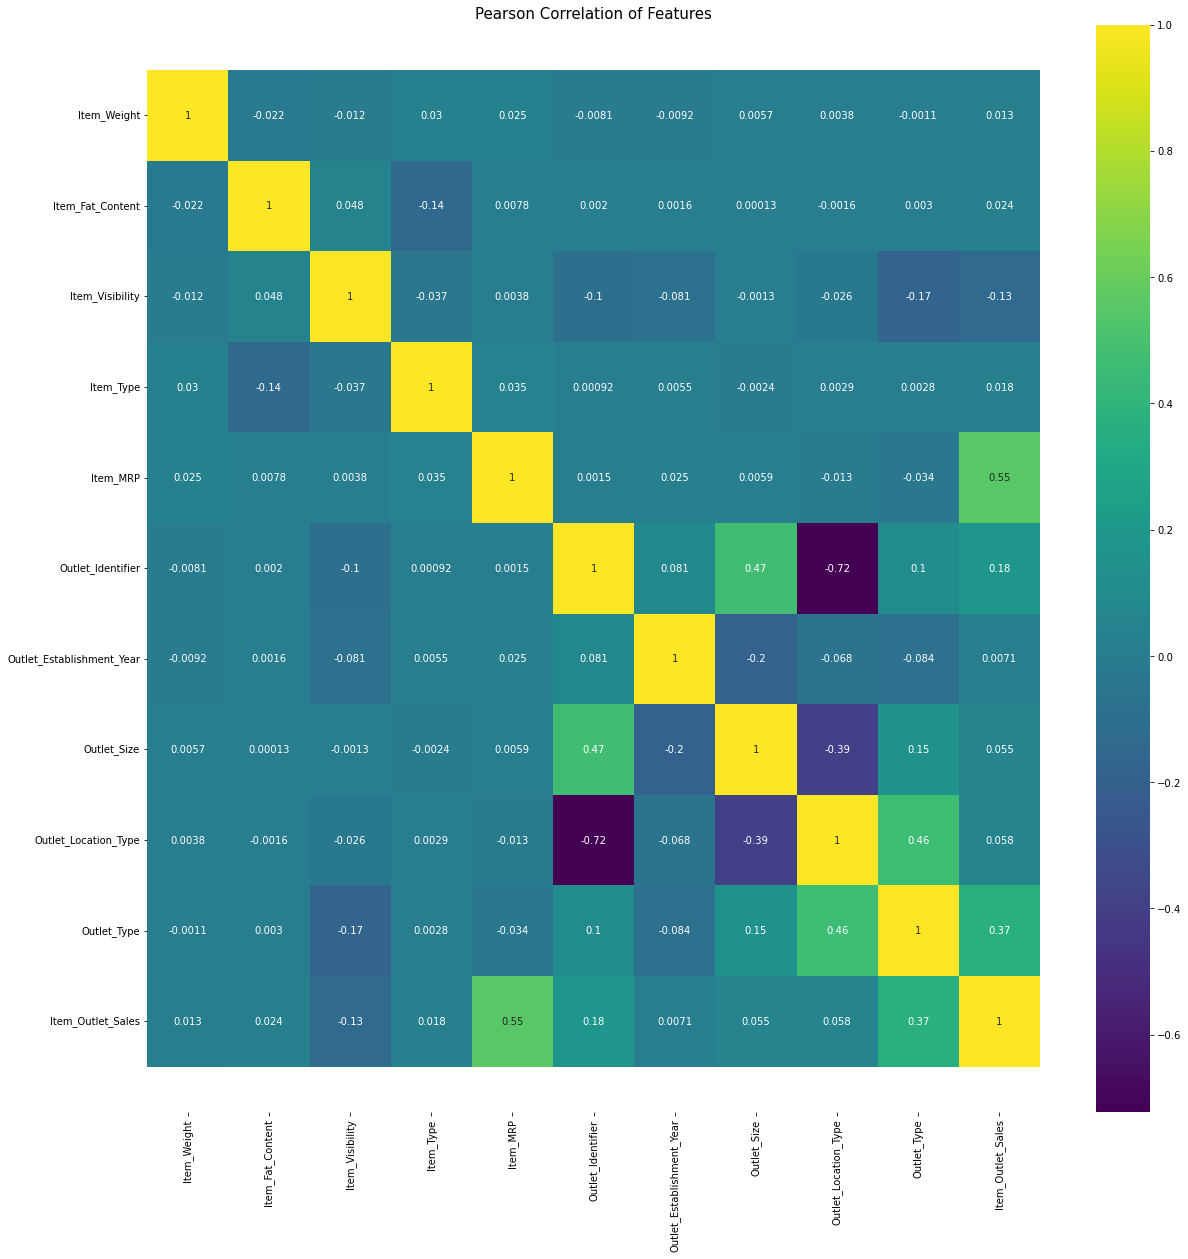

In [86]:
# Heatmap: the correlation between any two features/variables
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(supermarket.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [87]:
# Set the "Sales" as target/model output and the rest features as model inputs
y = supermarket['Item_Outlet_Sales']
X = supermarket.drop(['Item_Outlet_Sales'], axis=1)

In [88]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [89]:
#Sacaling the data into a smaller range (-3 to +3)
mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [90]:
#Linear Regression Model
lm_reg = linear_model.LinearRegression()
lm_reg.fit(X_train, y_train)

LinearRegression()

In [91]:
#training mean absolute error
lm_train_mae = mean_absolute_error(lm_reg.predict(X_train), y_train)
print('LinearRegression training mean absolute error: ', lm_train_mae)

#testing mean absolute error
lm_test_mae = mean_absolute_error(lm_reg.predict(X_test), y_test)
print('LinearRegression testing mean absolute error: ', lm_test_mae)

LinearRegression training mean absolute error:  835.9531497512953
LinearRegression testing mean absolute error:  813.5881859608403


In [92]:
#K Nearest Neighbors Model
knn_reg = neighbors.KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [93]:
#training mean absolute error
knn_train_mae = mean_absolute_error(knn_reg.predict(X_train), y_train)
print('KNN training mean absolute error: ', knn_train_mae)

#testing mean absolute error
knn_test_mae = mean_absolute_error(knn_reg.predict(X_test), y_test)
print('KNN testing mean absolute error: ', knn_test_mae)

KNN training mean absolute error:  633.9672923376819
KNN testing mean absolute error:  753.7984028057555


In [94]:
#Decision Tree Model
dt_reg = tree.DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [95]:
#training mean absolute error
dt_train_mae = mean_absolute_error(dt_reg.predict(X_train), y_train)
print('Decision Tree training mean absolute error: ', dt_train_mae)

#testing mean absolute error
dt_test_mae = mean_absolute_error(dt_reg.predict(X_test), y_test)
print('Decision Tree testing mean absolute error: ', dt_test_mae)

Decision Tree training mean absolute error:  0.0
Decision Tree testing mean absolute error:  984.9345450839329


In [96]:
#Support Vector Machine Model
svm_reg = svm.SVR()
svm_reg.fit(X_train, y_train)

SVR()

In [97]:
#training mean absolute error
svm_train_mae = mean_absolute_error(svm_reg.predict(X_train), y_train)
print('SVM mean absolute error: ', svm_train_mae)

#testing mean absolute error
svm_test_mae = mean_absolute_error(svm_reg.predict(X_test), y_test)
print('SVM testing mean absolute error: ', svm_test_mae)

SVM mean absolute error:  1145.1627261829099
SVM testing mean absolute error:  1062.4851442853235


In [98]:
#Random Forest Model
rf_reg = ensemble.RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
#training mean absolute error
rf_train_mae = mean_absolute_error(rf_reg.predict(X_train), y_train)
print('RandomForest mean absolute error: ', rf_train_mae)

#testing mean absolute error
rf_test_mae = mean_absolute_error(rf_reg.predict(X_test), y_test)
print('RandomForest testing mean absolute error: ', rf_test_mae)

RandomForest mean absolute error:  273.3045824375468
RandomForest testing mean absolute error:  731.7588541043165


<AxesSubplot:title={'center':'Train & Test MAE for different models'}>

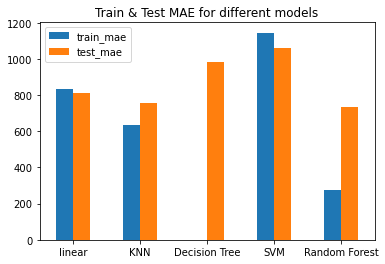

In [99]:
# Comparison
train_mae = [lm_train_mae, knn_train_mae, dt_train_mae, svm_train_mae, rf_train_mae]
test_mae =[lm_test_mae, knn_test_mae, dt_test_mae, svm_test_mae, rf_test_mae]
label =['linear', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']

df_mae = pd.DataFrame({'train_mae': train_mae,
                   'test_mae': test_mae}, index=label)
df_mae.plot.bar(rot=0, title ='Train & Test MAE for different models')


In [100]:
# Use the best model to make prediction on test data
y_pred = rf_reg.predict(X_test)
y_pred

array([3107.608184, 2984.022388, 3024.689452, ..., 3348.767602,
        111.674634, 2280.844376])

Text(0, 0.5, 'y_pred')

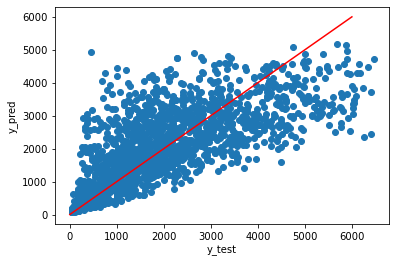

In [48]:
# Visualize y_test & y_pred
plt.scatter(y_test, y_pred)
plt.plot([0, 6000], [0,6000], 'r-')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [102]:
# Save the best model
import joblib
joblib.dump(rf_reg, "best_reg.pkl")

['best_reg.pkl']